In [267]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Dataset

In [268]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.cifar100.load_data()

In [269]:
# Cek jumlah data train dan test
print(f'panjang x train: {len(x_train_raw)}',
      f'panjang y train: {len(y_train_raw)}',
      f'panjang x test: {len(x_test_raw)}',
      f'panjang y test: {len(y_test_raw)}',
      sep='\n')

panjang x train: 50000
panjang y train: 50000
panjang x test: 10000
panjang y test: 10000


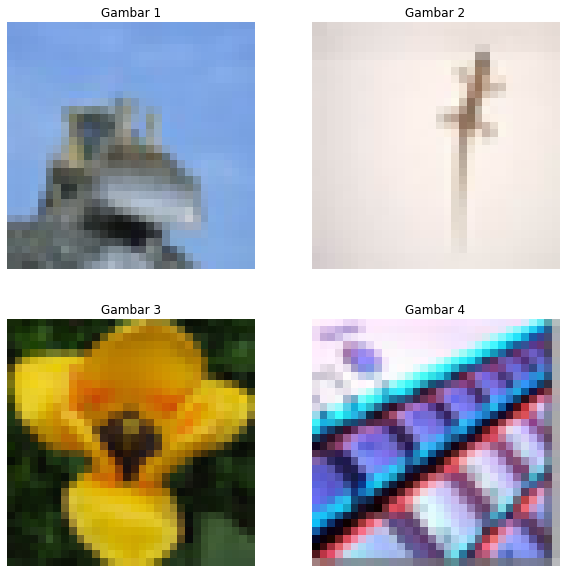

In [270]:
# Menampilkan sampel gambar
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)

plt.imshow(x_train_raw[41263])
plt.axis('off')
plt.title("Gambar 1")

fig.add_subplot(2, 2, 2)

plt.imshow(x_train_raw[10162])
plt.axis('off')
plt.title("Gambar 2")

fig.add_subplot(2, 2, 3)

plt.imshow(x_train_raw[25121])
plt.axis('off')
plt.title("Gambar 3")

fig.add_subplot(2, 2, 4)

plt.imshow(x_train_raw[200])
plt.axis('off')
plt.title("Gambar 4")

plt.show()

In [271]:
# Encode label
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [272]:
# Cek dimensi 
x_train_raw.shape

(50000, 32, 32, 3)

In [273]:
# Ubah dimensi 
x_train = tf.reshape(x_train_raw, [50000, 3072])
x_test = tf.reshape(x_test_raw, [10000, 3072])

In [274]:
# Menormalkan nilai piksel gambar
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

In [275]:
# Bangun arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=3072),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='exponential')
])

In [276]:
# Ringkasan detail parameter layer
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 512)               1573376   
                                                                 
 dense_64 (Dense)            (None, 512)               262656    
                                                                 
 dense_65 (Dense)            (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


# Buat Model

In [277]:
# Konfigurasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [278]:
# Latih model
history = model.fit(
    x_train,
    y_train,
    epochs=150,
    steps_per_epoch=20,
    validation_data=(x_test, y_test)
)

Epoch 1/150
20/20 [==============================] - 8s 402ms/step - loss: 4.4421 - accuracy: 0.0418 - val_loss: 4.1577 - val_accuracy: 0.0725
Epoch 2/150
20/20 [==============================] - 8s 393ms/step - loss: 4.0238 - accuracy: 0.0935 - val_loss: 3.9306 - val_accuracy: 0.1036
Epoch 3/150
20/20 [==============================] - 8s 390ms/step - loss: 3.8311 - accuracy: 0.1249 - val_loss: 3.7855 - val_accuracy: 0.1324
Epoch 4/150
20/20 [==============================] - 8s 389ms/step - loss: 3.6940 - accuracy: 0.1462 - val_loss: 3.6759 - val_accuracy: 0.1514
Epoch 5/150
20/20 [==============================] - 9s 433ms/step - loss: 3.5898 - accuracy: 0.1636 - val_loss: 3.6125 - val_accuracy: 0.1619
Epoch 6/150
20/20 [==============================] - 8s 394ms/step - loss: 3.5149 - accuracy: 0.1782 - val_loss: 3.5471 - val_accuracy: 0.1743
Epoch 7/150
20/20 [==============================] - 8s 394ms/step - loss: 3.4476 - accuracy: 0.1901 - val_loss: 3.5082 - val_accuracy: 0.1844

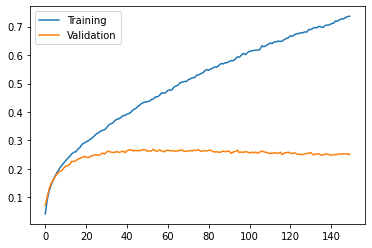

In [279]:
# Grafik learning rate
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()